In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #helps us to do regression
import statsmodels.formula.api as smf  #helps us to do regression
from sklearn.metrics import r2_score

In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\s

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6E82-34BE

 Directory of C:\Users\KUMAR SANU\Assignment\Simple regression

23-02-2021  13:16    <DIR>          .
23-02-2021  13:16    <DIR>          ..
23-02-2021  10:51    <DIR>          .ipynb_checkpoints
22-02-2021  14:09            68,105 Delivery _ time.ipynb
22-02-2021  13:48               177 delivery_time.csv
23-02-2021  13:16            58,895 Salary.ipynb
22-02-2021  00:08               454 Salary_Data.csv
               4 File(s)        127,631 bytes
               3 Dir(s)  171,216,703,488 bytes free


In [3]:
sal=pd.read_csv('Salary_Data.csv')

In [4]:
sal.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
sal.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [7]:
type(sal)

pandas.core.frame.DataFrame

In [8]:
sal.shape # data have 30 rows and 2 columns

(30, 2)

In [9]:
sal.dtypes

YearsExperience    float64
Salary             float64
dtype: object

1st business moments

In [10]:
sal.mean() # average experince is 5.3 years and average salary is 76003

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [11]:
sal.median() #middle value of experince is 4.7 years and middle value for salary is 65237.

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [12]:
from scipy import stats as stats

In [13]:
stats.mode(sal['YearsExperience'])

ModeResult(mode=array([3.2]), count=array([2]))

In [14]:
stats.mode(sal['Salary'])

ModeResult(mode=array([37731.]), count=array([1]))

2nd business moments

In [15]:
sal.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [16]:
sal.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

3rd and 4th business moments

In [17]:
sal.skew()  #skewness is in positive value we can say that we have symmetry data (is symmetric if it looks the same to the left and right of the center point.)

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [18]:
sal.kurt() # Data sets with low kurtosis which means  have light tails and lack of outliers

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

Visualization

array([[<AxesSubplot:title={'center':'YearsExperience'}>]], dtype=object)

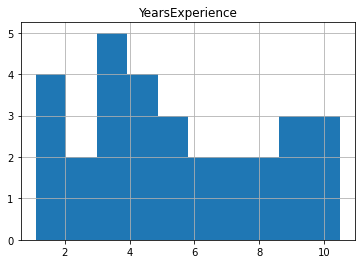

In [19]:
sal.hist('YearsExperience') #

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

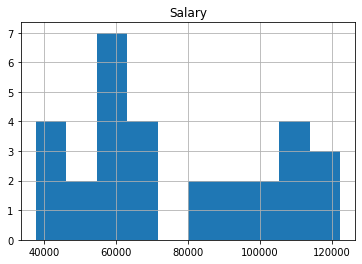

In [20]:
sal.hist('Salary')

<AxesSubplot:>

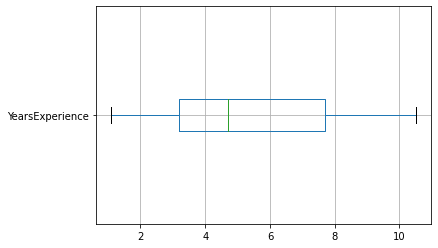

In [21]:
sal.boxplot('YearsExperience',vert=False) #middle value of data is between 4 to 6 and data dont have outlier  

<AxesSubplot:>

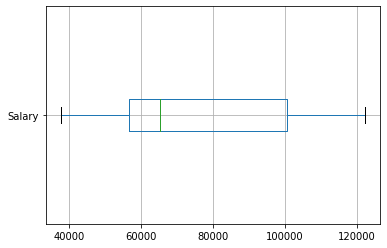

In [22]:
sal.boxplot('Salary',vert=False) # most of the salary 60,000 & 80,000 and data dont have outlier 

{'bodies': [<matplotlib.collections.PolyCollection at 0x21eecbb86c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x21eecafe848>,
 'cmins': <matplotlib.collections.LineCollection at 0x21eecbac108>,
 'cbars': <matplotlib.collections.LineCollection at 0x21eecbb8bc8>}

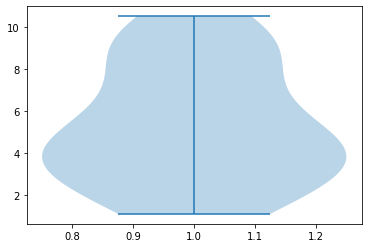

In [23]:
plt.violinplot(sal['YearsExperience']) #high distribution years experince 3 to 4

{'bodies': [<matplotlib.collections.PolyCollection at 0x21eecc1a9c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x21eec9b96c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x21eecaf7e48>,
 'cbars': <matplotlib.collections.LineCollection at 0x21eecaf7a48>}

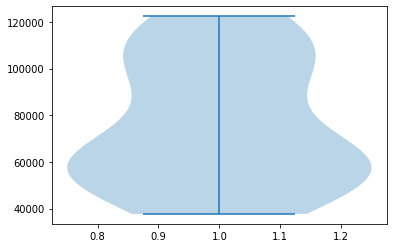

In [24]:
plt.violinplot(sal['Salary']) #high distribution years experince 60000 to 70000

In [25]:
import seaborn as sns

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

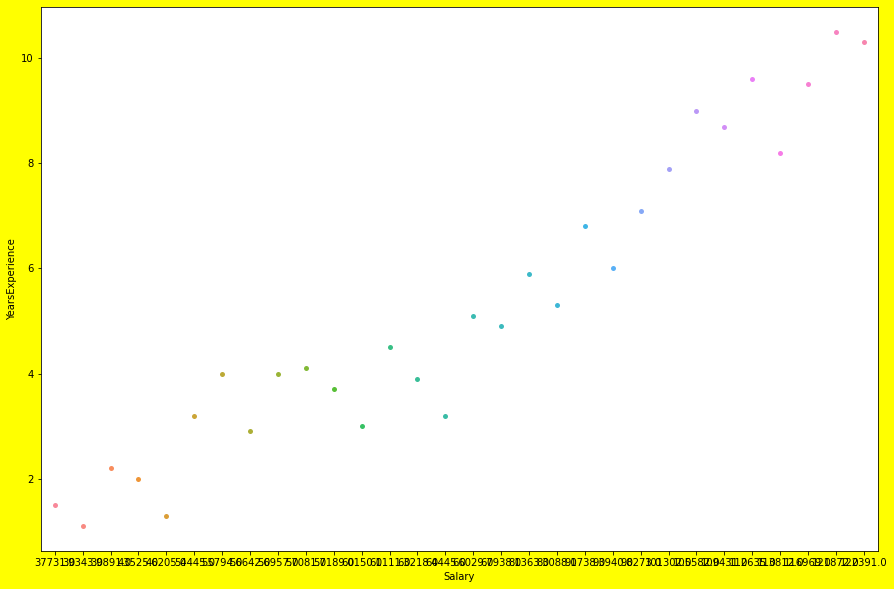

In [30]:
plt.figure(figsize=(15,10),facecolor="yellow")
sns.swarmplot(x='Salary',y='YearsExperience',data=sal) #With this we can find that data have positive co - linearity


In [31]:
sal.corr() #year experince and salary have high co-relation 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [39]:
lm=smf.ols("Salary~YearsExperience",data=sal).fit()

In [40]:
lm.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.14e-20
Time:                        10:27:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
lm.predict(sal)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

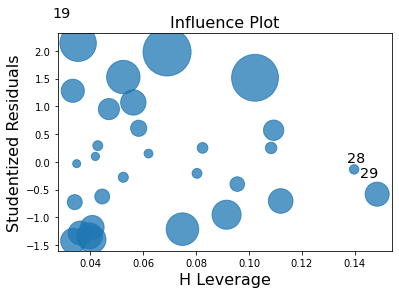

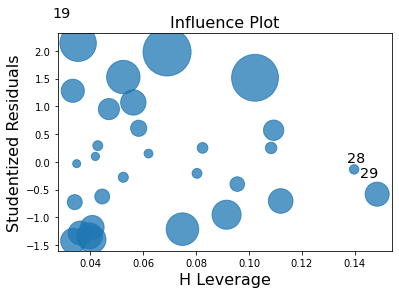

In [46]:
    import statsmodels.api as sm
    sm.graphics.influence_plot(lm)

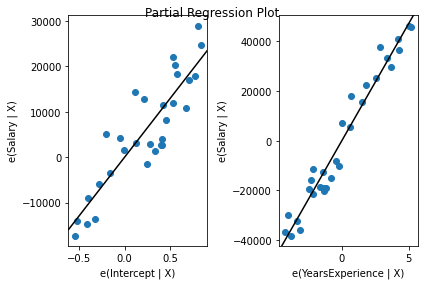

In [47]:
sm.graphics.plot_partregress_grid(lm)
plt.show()

In [48]:
lm.predict(sal)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64